<a href="https://colab.research.google.com/github/KSaiBharadwaj/fraudanalytics/blob/main/DSO562HW2P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [213]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as smf

In [214]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

data = pd.read_csv("/content/sample_data/ozone.csv")
# checking for negative values and zeros
data.describe()

,rad,temp,wind,ozone
count,111.000000,111.000000,111.000000,111.000000
mean,184.801802,77.792793,9.938739,42.099099
std,91.152302,9.529969,3.559218,33.275969
min,7.000000,57.000000,2.300000,1.000000
25%,113.500000,71.000000,7.400000,18.000000
50%,207.000000,79.000000,9.700000,31.000000
75%,255.500000,84.500000,11.500000,62.000000
max,334.000000,97.000000,20.700000,168.000000


In [215]:
# Checking for null values
data.isnull().sum()

rad      0
temp     0
wind     0
ozone    0
dtype: int64

In [216]:
# correlation between the variables
data.corr()

,rad,temp,wind,ozone
rad,1.000000,0.294088,-0.127366,0.348342
temp,0.294088,1.000000,-0.497146,0.698541
wind,-0.127366,-0.497146,1.000000,-0.612951
ozone,0.348342,0.698541,-0.612951,1.000000


0.7592748286800515
[ 0.06339674  1.6229136  -3.45349018]
-60.992391089278314


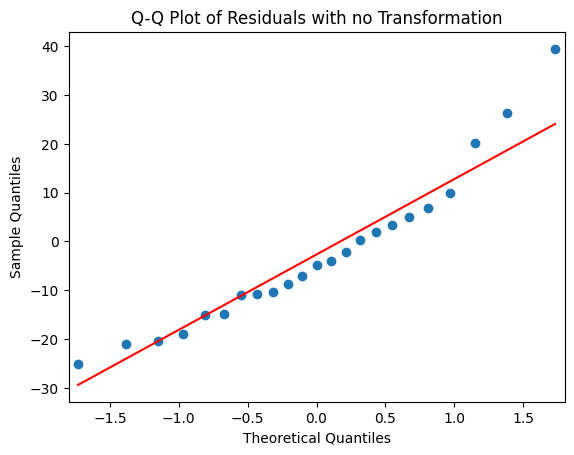

In [217]:
# There are no negative values and zeros as per data.describe func

X = data.drop(columns='ozone')
y = data['ozone']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Linear reg model without any transformation

lr = linear_model.LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(r2_score(y_test,y_pred))
print(lr.coef_)
print(lr.intercept_)

# Calculating residuals

y_resd = y_test-y_pred

smf.qqplot(y_resd, line="s")
plt.title("Q-Q Plot of Residuals with no Transformation")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The Residual QQ Plot looks near normal and the R squared error comes around 0.759

0.7041940964706037
[ 0.29661008  3.32940283 -0.74616019]
-10.859724226002815


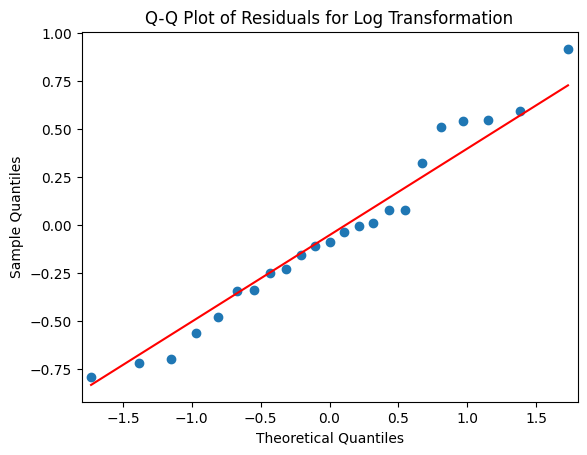

In [218]:
# Using Log Function transformation

data_log = np.log(data)
X_log = data_log.drop(columns='ozone')
y_log = data_log.iloc[:,-1]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log,y_log, test_size=0.2, random_state=42)

# Linear reg model with log transformation

lr_log = linear_model.LinearRegression()
lr_log.fit(X_train_log,y_train_log)
y_pred_log = lr_log.predict(X_test_log)

print(r2_score(y_test_log,y_pred_log))
print(lr_log.coef_)
print(lr_log.intercept_)

# Calculating residuals

y_resd_log = y_test_log - y_pred_log

smf.qqplot(y_resd_log, line="s")
plt.title("Q-Q Plot of Residuals for Log Transformation")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The Residual QQ plot of log transformed data looks near normal but there has been a decrease in the R Squared error (0.704)

0.7542678232341926
[ 0.24667582  0.56317601 -0.31088755]
0.011071859003643877


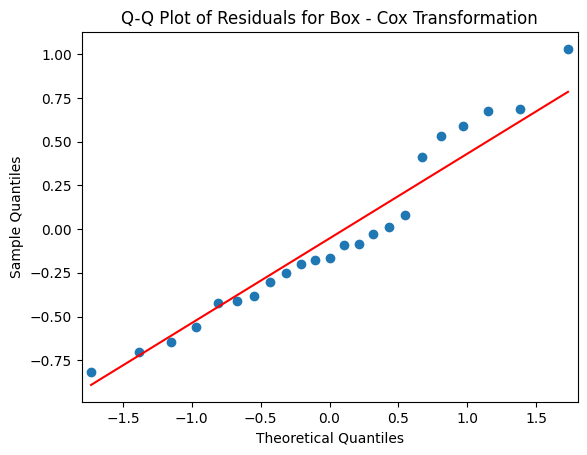

In [219]:
# Applying Box-Cox Transform to the raw data

pt = PowerTransformer(method="box-cox")
data_boxcox_df = pd.DataFrame(pt.fit_transform(data), columns=['rad','temp','wind','ozone'])

# Segregating the data

X_bc = data_boxcox_df.drop(columns='ozone')
y_bc = data_boxcox_df['ozone']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

#Running the linear reg model and calculating the residuals
lr_bc = linear_model.LinearRegression()
lr_bc.fit(X_train_bc, y_train_bc)
y_pred_bc = lr_bc.predict(X_test_bc)

print(r2_score(y_test_bc,y_pred_bc))
print(lr_bc.coef_)
print(lr_bc.intercept_)

y_resd_bc = y_test_bc - y_pred_bc


smf.qqplot(y_resd_bc, line="s")
plt.title("Q-Q Plot of Residuals for Box - Cox Transformation")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The Residuals look normally distributed for Box - Cox transformation and we can see an increase in R squared value in comparison with Log transformation

0.752680902750246
[ 0.24703358  0.5632451  -0.31140024]
0.011046582002837847


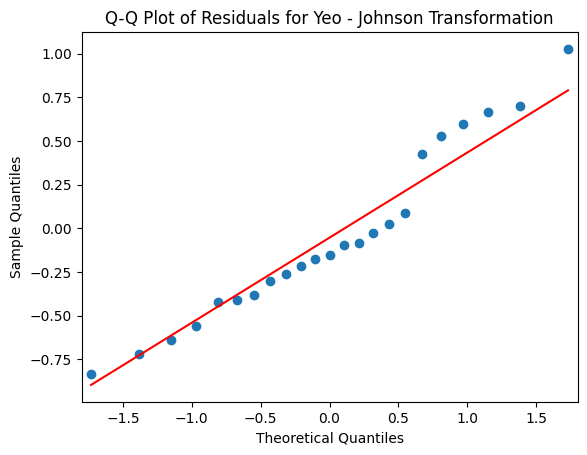

In [220]:
# Applying Yeo-Johnson Transform to the raw data

pt = PowerTransformer(method="yeo-johnson")
data_yj = pd.DataFrame(pt.fit_transform(data), columns=['rad','temp','wind','ozone'])

# Segregating the data

X_yj = data_yj.drop(columns='ozone')
y_yj = data_yj['ozone']

X_train_yj, X_test_yj, y_train_yj, y_test_yj = train_test_split(X_yj, y_yj, test_size=0.2, random_state=42)

#Running the linear reg model and calculating the residuals
lr_yj = linear_model.LinearRegression()
lr_yj.fit(X_train_yj, y_train_yj)
y_pred_yj = lr_yj.predict(X_test_yj)

print(r2_score(y_test_yj,y_pred_yj))
print(lr_yj.coef_)
print(lr_yj.intercept_)

y_resd_yj = y_test_yj - y_pred_yj


smf.qqplot(y_resd_yj, line="s")
plt.title("Q-Q Plot of Residuals for Yeo - Johnson Transformation")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Based on the transformations, Box-Cox's R-Squared error is more compared to other transformations and the residual qq plot looks normal. But R Squared error with no transformation is the highest among all.